# verificando o score das subwords
## Se uma palavra tem várias subwords a sua pontuação será a soma das log probabilidades (após o softmax)


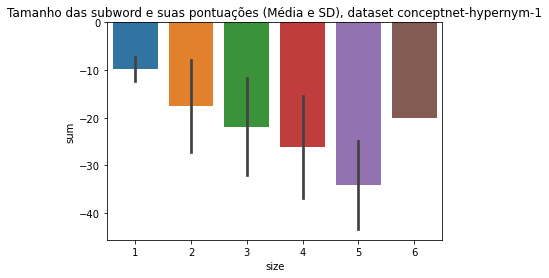

In [17]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

patterns = ["{} é um tipo de {}", "{} é um {}", "{} e outros {}", "{} ou outro {}", "{} , um {}"]

with open("../models/neuralmind-bert-base-portuguese-cased/conceptnet-hypernym-1.json", mode="r") as f:
    data_json = json.load(f)

df = pd.DataFrame(columns=['data', 'hiponimo_len', 'hiponimo_sum','hiperonimo_len','hiperonimo_sum', 'classe', 'padrao', 'fonte'])
idx = 0
i=0
for k, v in data_json.items():
    for p, x in v.items():
        df.loc[idx] = [k] + [len(x[0])] + [np.sum(x[0])] + [len(x[1])] + [np.sum(x[1])] + [k.split()[2]] + [p] +[k.split()[3]]
        idx += 1

plt.figure()
df_hipo = df[df['padrao'] == patterns[0]][['hiponimo_len', 'hiponimo_sum']].rename(columns={'hiponimo_len':'size', 'hiponimo_sum':'sum'})
df_hiper = df[df['padrao'] == patterns[0]][['hiperonimo_len', 'hiperonimo_sum']].rename(columns={'hiperonimo_len':'size', 'hiperonimo_sum':'sum'})
df_plot = pd.concat([df_hipo, df_hiper])
ax = sns.barplot(x='size', y='sum', ci="sd", data=df_plot)
_ = ax.set_title("Tamanho das subword e suas pontuações (Média e SD), dataset conceptnet-hypernym-1")